In [9]:
import random 

import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pandas_datareader import data

# Financial Market

<img src="https://miro.medium.com/max/1400/1*AvsetQbkHnchRQxE4jB9hw.jpeg" width="900px">

###  Searching financial market dataset using Yahoo

In [10]:
def format_index(df: dict):
    df['DateIndex'] = df.index
    df['DateIndex'] = df['DateIndex'].astype('datetime64')
    return df

def download_dataframe(name: str, start_date: str, end_date: str):
    return data.DataReader(name=name, data_source='yahoo', start=start_date, end=end_date)

def download_list_stocks(stocks: list, field: str, start_date: str, end_date: str):
    stocks_dataframe = pd.DataFrame()
    for stock in stocks:
        stocks_dataframe[stock] = download_dataframe(stock, start_date=start_date, end_date=end_date)[field]
    return stocks_dataframe
                                                     
def get_random_color():
    r1 = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r1(),r1(),r1())

def save_dataframe(df: dict, file_path: str):
    df.read_csv(file_path)
    print("Success saved!")

dataframe = download_dataframe(name='PETR3.SA', start_date='2018-01-01', end_date='2022-01-01')

In [13]:
dataframe = format_index(dataframe)
dataframe.head(20)

,High,Low,Open,Close,Volume,Adj Close,DateIndex
Date,,,,,,,
2018-01-02,17.330000,16.980000,16.990000,17.330000,4488000.0,13.262568,2018-01-02
2018-01-03,17.670000,17.209999,17.240000,17.549999,9771700.0,13.430933,2018-01-03
2018-01-04,17.900000,17.629999,17.670000,17.700001,6816500.0,13.545728,2018-01-04
2018-01-05,17.850000,17.600000,17.690001,17.840000,4646500.0,13.652869,2018-01-05
2018-01-08,18.120001,17.610001,17.639999,18.120001,4763400.0,13.867151,2018-01-08
2018-01-09,18.270000,18.010000,18.059999,18.120001,6570100.0,13.867151,2018-01-09
2018-01-10,18.110001,17.760000,18.000000,17.780001,4720000.0,13.606951,2018-01-10
2018-01-11,18.270000,17.809999,17.889999,18.219999,10075000.0,13.943680,2018-01-11
2018-01-12,18.410000,18.020000,18.100000,18.360001,5516100.0,14.050820,2018-01-12


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 989 entries, 2018-01-02 to 2021-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   High       989 non-null    float64       
 1   Low        989 non-null    float64       
 2   Open       989 non-null    float64       
 3   Close      989 non-null    float64       
 4   Volume     989 non-null    float64       
 5   Adj Close  989 non-null    float64       
 6   DateIndex  989 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 61.8 KB


In [15]:
dataframe.describe()

,High,Low,Open,Close,Volume,Adj Close
count,989.000000,989.000000,989.000000,989.000000,9.890000e+02,989.000000
mean,26.366603,25.555389,25.963670,25.951699,1.644166e+07,20.872548
std,4.491180,4.518754,4.505001,4.507577,1.327794e+07,3.978981
min,12.200000,10.500000,11.000000,11.050000,0.000000e+00,8.683578
25%,23.080000,22.430000,22.740000,22.650000,8.394200e+06,17.878939
50%,27.799999,26.900000,27.299999,27.260000,1.321610e+07,21.868271
75%,29.990000,29.200001,29.590000,29.610001,1.949890e+07,23.855654
max,33.700001,32.779999,33.000000,33.450001,1.374106e+08,31.559999


In [16]:
dataframe[dataframe['High'] >= 21.00]

,High,Low,Open,Close,Volume,Adj Close,DateIndex
Date,,,,,,,
2018-01-26,21.770000,20.490000,21.030001,21.709999,16923900.0,16.614557,2018-01-26
2018-01-29,21.940001,21.160000,21.420000,21.709999,11910900.0,16.614557,2018-01-29
2018-01-30,21.590000,20.820000,21.530001,21.180000,19950900.0,16.208954,2018-01-30
2018-01-31,21.650000,21.299999,21.490000,21.299999,9513700.0,16.300787,2018-01-31
2018-02-01,22.170000,21.209999,21.299999,22.129999,12612400.0,16.935982,2018-02-01
...,...,...,...,...,...,...,...
2021-12-23,30.680000,30.180000,30.350000,30.440001,6243500.0,30.440001,2021-12-23
2021-12-27,31.230000,30.240000,30.440001,31.040001,17868100.0,31.040001,2021-12-27
2021-12-28,31.469999,31.000000,31.260000,31.059999,8078000.0,31.059999,2021-12-28


In [18]:
def get_candles_plot(df: dict, title: str, stock_name=''):
    fig = go.Figure(data=[go.Candlestick(x=dataframe['DateIndex'],
          open=dataframe['Open'],
          high=dataframe['High'],
          low=dataframe['Low'],
          close=dataframe['Close'])])
    
    fig.update_layout(title=f'{title}: {stock_name}')
    fig.show()
    
get_candles_plot(dataframe, 'Stock price', 'PETR3.SA')

In [19]:
fig = px.bar(dataframe, x='DateIndex', y='Volume')
fig.update_layout(title=f' Volume negociations: PETR3.SA')
fig.show()

In [21]:
stocks_list = ["VALE3.SA", "BBDC3.SA", "ITSA3.SA", "ITUB3.SA", "BBAS3.SA", 
               "PETR3.SA", "VALE3.SA", "JBSS3.SA", "OIBR3.SA", "GOLL4.SA", 
               "IRBR3.SA", "CIEL3.SA"]
dataframe_stocks = download_list_stocks(stocks_list, "Close", "2019-01-01", "2022-01-01")
dataframe_stocks.head(100)
print(len(dataframe_stocks))

743


In [23]:
dataframe_stocks.isnull().sum()
dataframe_stocks.dropna(inplace=True)

In [24]:
def get_stocks_histplot(df: dict, stocks: list):
    for index, stock in enumerate(stocks):
        f, (ax1) = plt.subplots(1, 1, figsize=(14, 2))
        v_dist_1 = df[f"{stock}"].values
        sns.histplot(v_dist_1, ax=ax1, color=get_random_color(), kde=True)
        ax1.set_title(f"{stock}: Close", fontsize=12)

In [25]:
dataframe_stocks['DateIndex'] = dataframe_stocks.index
dataframe_stocks['DateIndex'] = dataframe_stocks['DateIndex'].astype('datetime64')
dataframe_stocks.head(4)

,VALE3.SA,BBDC3.SA,ITSA3.SA,ITUB3.SA,BBAS3.SA,PETR3.SA,JBSS3.SA,OIBR3.SA,GOLL4.SA,IRBR3.SA,CIEL3.SA,DateIndex
Date,,,,,,,,,,,,
2019-01-02,51.090000,24.634987,13.066666,31.959999,48.599998,26.650000,12.04,1.26,25.450001,25.659578,9.63,2019-01-02
2019-01-03,49.000000,25.137741,13.333333,32.250000,48.799999,27.200001,12.23,1.41,25.629999,25.357700,9.40,2019-01-03
2019-01-04,52.189999,24.586777,13.400000,31.709999,48.799999,27.510000,12.55,1.41,25.000000,25.074306,10.15,2019-01-04
2019-01-07,51.910000,24.793388,13.219047,32.119999,48.480000,28.400000,12.11,1.42,23.900000,25.326897,10.06,2019-01-07


In [26]:
def stock_plot_line(df: dict, stocks: list, title=''):
    fig = go.Figure()
    for stock in stocks:
        fig.add_trace(go.Scatter(x=df['DateIndex'], y=df[stock],
                    mode='lines',
                    name=stock))
    fig.update_layout(title=title)
    fig.show()

stock_plot_line(dataframe_stocks, stocks_list, title='Stocks price - close')

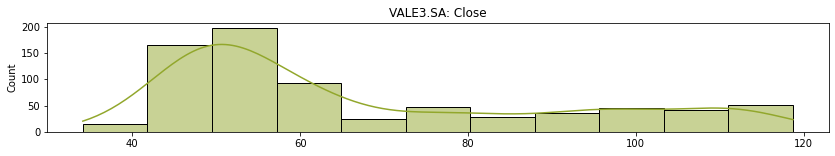

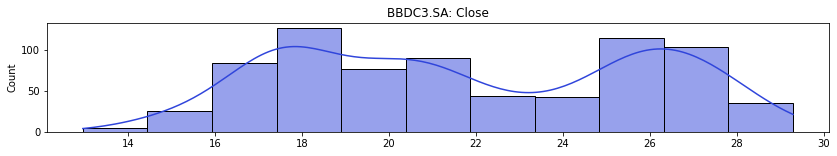

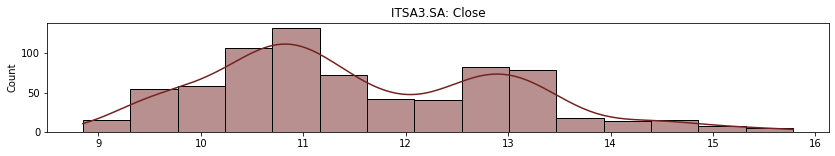

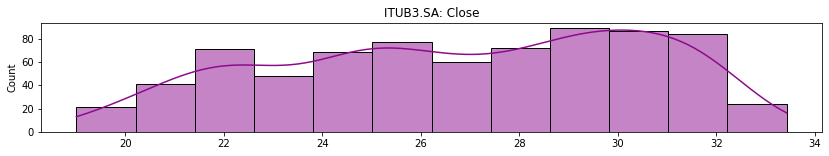

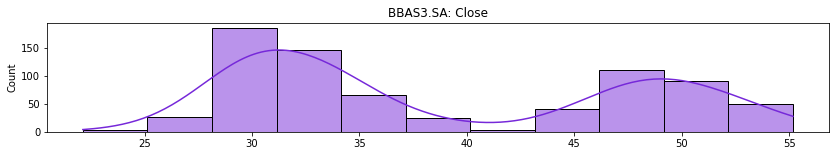

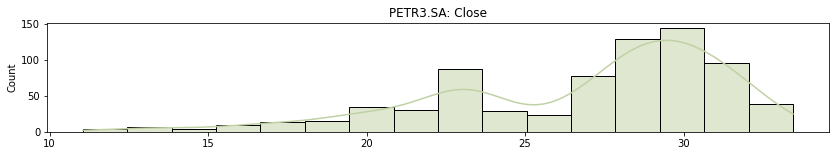

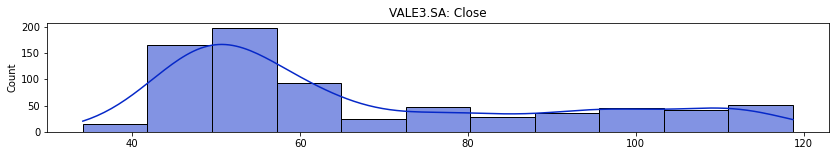

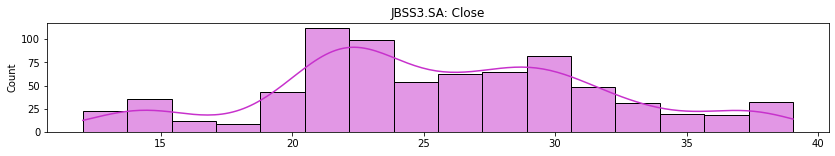

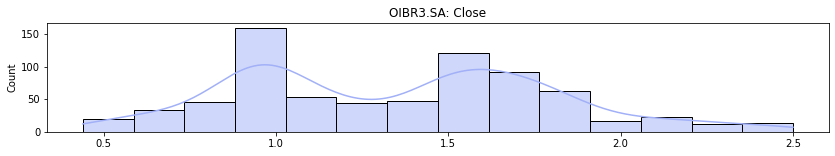

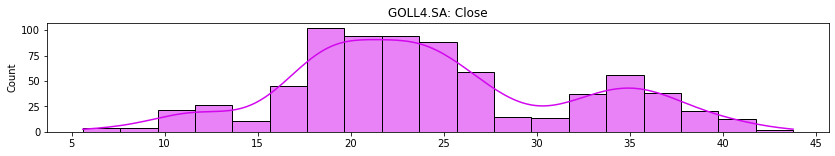

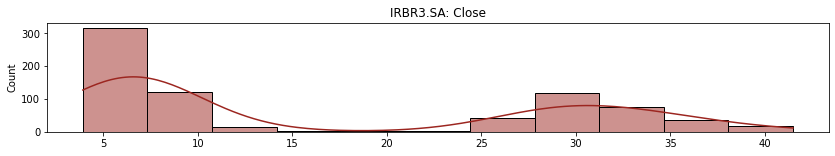

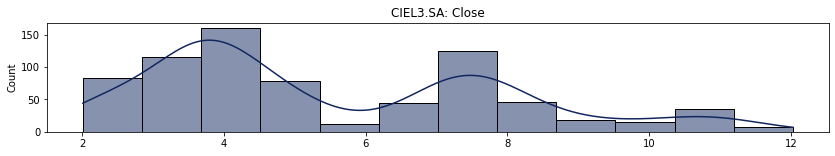

In [27]:
get_stocks_histplot(dataframe_stocks, stocks_list)

In [15]:
def get_data_normalize(df: dict):
    dataframe_stocks_norm = df.copy()
    for stock in dataframe_stocks_norm.columns[:-1]:
        dataframe_stocks_norm[stock] =  dataframe_stocks_norm[stock] / dataframe_stocks_norm[stock][0]
    return dataframe_stocks_norm

In [16]:
dataframe_stocks_norm = get_data_normalize(dataframe_stocks)
dataframe_stocks_norm.head(10)

,VALE3.SA,BBDC3.SA,ITSA3.SA,ITUB3.SA,BBAS3.SA,PETR3.SA,JBSS3.SA,OIBR3.SA,GOLL4.SA,IRBR3.SA,CIEL3.SA,DateIndex
Date,,,,,,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2019-01-02
2019-01-03,0.959092,1.020408,1.020408,1.009074,1.004115,1.020638,1.015781,1.119048,1.007073,0.988235,0.976116,2019-01-03
2019-01-04,1.021531,0.998043,1.025510,0.992178,1.004115,1.032270,1.042359,1.119048,0.982318,0.977191,1.053998,2019-01-04
2019-01-07,1.016050,1.006430,1.011662,1.005006,0.997531,1.065666,1.005814,1.126984,0.939096,0.987035,1.044652,2019-01-07
2019-01-08,1.025837,1.017612,1.016035,1.007509,0.986214,1.060038,1.021595,1.095238,0.926915,0.996399,1.009346,2019-01-08
2019-01-09,1.050891,1.038859,1.035714,1.016896,0.983539,1.081426,1.013289,1.111111,0.922593,0.993758,1.051921,2019-01-09
2019-01-10,1.039342,1.041935,1.042274,1.016896,0.997942,1.076173,1.009967,1.134921,0.913556,0.973349,1.151610,2019-01-10
2019-01-11,1.025250,1.037741,1.043732,1.005319,1.002058,1.069418,1.036545,1.134921,0.980746,0.953782,1.112150,2019-01-11
2019-01-14,1.029556,1.038859,1.040088,1.016896,1.025309,1.065666,1.053987,1.071429,0.988605,0.949580,1.131879,2019-01-14


In [17]:
stock_plot_line(dataframe_stocks_norm, stocks_list, title='Stocks price - close: normalized')

## Rate of return - Stocks

In [18]:
def get_rate_return_log(df: dict, stock_name: str):
    return np.log(df[stock_name][len(df)-1] / df[stock_name][0])

def get_rate_return_daily(df: dict, stock_name: str):
    return (df[stock_name] / df[stock_name].shift(1)) - 1
    
def get_rate_return(df: dict, stock_name: str):
    Xfinal = df[stock_name][len(df) - 1]
    Xstart = df[stock_name][0]
    stock_return_rate = round(((Xfinal - Xstart) / Xstart) * 100, 1)
    return stock_return_rate

def get_all_rate_return_daily(df: dict, stock_list: list):
    df_copy = df.copy()
    for stock in stock_list:
        df_copy[f"{stock}_Rate"] = get_rate_return_daily(df_copy, stock)
    return df_copy

def get_all_rate_return_log(df: dict, stock_list: list):
    stock_name = list()
    stock_value = list()
    for stock in stock_list:
        stock_name.append(stock)
        stock_value.append(get_rate_return_log(df, stock))
    return {'stock': stock_name, 'rate': stock_value}

def get_all_rate_return(df: dict, stock_list: list):
    stock_name = list()
    stock_value = list()
    for stock in stock_list:
        stock_name.append(stock)
        stock_value.append(get_rate_return(df, stock))
    return {'stock': stock_name, 'rate': stock_value}
        

In [19]:
stock_rate_return = get_all_rate_return(dataframe_stocks, stocks_list)
stock_rate_return_log = get_all_rate_return_log(dataframe_stocks, stocks_list)
stock_rate_return_daily = get_all_rate_return_daily(dataframe_stocks, stocks_list)

stock_rate_return = pd.DataFrame.from_dict(stock_rate_return)
stock_rate_return_log = pd.DataFrame.from_dict(stock_rate_return_log)
stock_rate_return.head()

,stock,rate
0,VALE3.SA,52.6
1,BBDC3.SA,-34.3
2,ITSA3.SA,-28.8
3,ITUB3.SA,-40.3
4,BBAS3.SA,-40.6


In [20]:
stock_rate_return_log.head()

,stock,rate
0,VALE3.SA,0.422607
1,BBDC3.SA,-0.419774
2,ITSA3.SA,-0.340050
3,ITUB3.SA,-0.515320
4,BBAS3.SA,-0.521513


In [21]:
stock_rate_return["Color"] = np.where(stock_rate_return["rate"] < 0, 'red', 'green')
stock_rate_return_log["Color"] = np.where(stock_rate_return_log["rate"] < 0, 'red', 'green')
stock_rate_return.head()

,stock,rate,Color
0,VALE3.SA,52.6,green
1,BBDC3.SA,-34.3,red
2,ITSA3.SA,-28.8,red
3,ITUB3.SA,-40.3,red
4,BBAS3.SA,-40.6,red


In [22]:
stock_rate_return_log.head()

,stock,rate,Color
0,VALE3.SA,0.422607,green
1,BBDC3.SA,-0.419774,red
2,ITSA3.SA,-0.340050,red
3,ITUB3.SA,-0.515320,red
4,BBAS3.SA,-0.521513,red


In [23]:
stock_rate_return_daily.head()

,VALE3.SA,BBDC3.SA,ITSA3.SA,ITUB3.SA,BBAS3.SA,PETR3.SA,JBSS3.SA,OIBR3.SA,GOLL4.SA,IRBR3.SA,...,BBDC3.SA_Rate,ITSA3.SA_Rate,ITUB3.SA_Rate,BBAS3.SA_Rate,PETR3.SA_Rate,JBSS3.SA_Rate,OIBR3.SA_Rate,GOLL4.SA_Rate,IRBR3.SA_Rate,CIEL3.SA_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,51.090000,24.634987,13.066666,31.959999,48.599998,26.650000,12.04,1.26,25.450001,25.659578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,49.000000,25.137741,13.333333,32.250000,48.799999,27.200001,12.23,1.41,25.629999,25.357700,...,0.020408,0.020408,0.009074,0.004115,0.020638,0.015781,0.119048,0.007073,-0.011765,-0.023884
2019-01-04,52.189999,24.586777,13.400000,31.709999,48.799999,27.510000,12.55,1.41,25.000000,25.074306,...,-0.021918,0.005000,-0.016744,0.000000,0.011397,0.026165,0.000000,-0.024581,-0.011176,0.079787
2019-01-07,51.910000,24.793388,13.219047,32.119999,48.480000,28.400000,12.11,1.42,23.900000,25.326897,...,0.008403,-0.013504,0.012930,-0.006557,0.032352,-0.035060,0.007092,-0.044000,0.010074,-0.008867
2019-01-08,52.410000,25.068871,13.276190,32.200001,47.930000,28.250000,12.30,1.38,23.590000,25.567167,...,0.011111,0.004323,0.002491,-0.011345,-0.005282,0.015690,-0.028169,-0.012971,0.009487,-0.033797


In [24]:
def get_plot_rate_return(stock_rate_return: dict):
    fig = go.Figure()
    fig.add_trace(
        go.Bar(name='rate',
               x=stock_rate_return['stock'],
               y=stock_rate_return['rate'],
               marker_color=stock_rate_return['Color']))
    fig.update_layout(barmode='stack', title="Rate return in period")
    fig.show()

get_plot_rate_return(stock_rate_return)

In [25]:
wallet_stock_list = ["PETR3.SA", "GOLL4.SA", "CIEL3.SA"]
create_stock_wallet = download_list_stocks(wallet_stock_list, "Close", "2019-01-01", "2022-01-01")
create_stock_wallet.head(10)

,PETR3.SA,GOLL4.SA,CIEL3.SA
Date,,,
2019-01-02,26.650000,25.450001,9.63
2019-01-03,27.200001,25.629999,9.40
2019-01-04,27.510000,25.000000,10.15
2019-01-07,28.400000,23.900000,10.06
2019-01-08,28.250000,23.590000,9.72
2019-01-09,28.820000,23.480000,10.13
2019-01-10,28.680000,23.250000,11.09
2019-01-11,28.500000,24.959999,10.71
2019-01-14,28.400000,25.160000,10.90


In [26]:
create_stock_wallet = format_index(create_stock_wallet)
create_stock_wallet_norm = get_data_normalize(create_stock_wallet)
create_stock_wallet_norm.drop(labels=['DateIndex'], axis=1, inplace=True)
wallet_return = (create_stock_wallet_norm / create_stock_wallet_norm.shift(1)) - 1
wallet_weight = np.array([0.2, 0.4, 0.4])
create_stock_wallet.head(10)

,PETR3.SA,GOLL4.SA,CIEL3.SA,DateIndex
Date,,,,
2019-01-02,26.650000,25.450001,9.63,2019-01-02
2019-01-03,27.200001,25.629999,9.40,2019-01-03
2019-01-04,27.510000,25.000000,10.15,2019-01-04
2019-01-07,28.400000,23.900000,10.06,2019-01-07
2019-01-08,28.250000,23.590000,9.72,2019-01-08
2019-01-09,28.820000,23.480000,10.13,2019-01-09
2019-01-10,28.680000,23.250000,11.09,2019-01-10
2019-01-11,28.500000,24.959999,10.71,2019-01-11
2019-01-14,28.400000,25.160000,10.90,2019-01-14


In [27]:
stock_plot_line(create_stock_wallet, wallet_stock_list, title='Stocks price wallet - close: normalized')

In [28]:
year_return_rate = wallet_return.mean() * 246

In [29]:
def plot_indicator_return(value):
    fig = go.Figure()
    color = 'green'
    print(value)
    if value < 0:
        color = 'red'
    if value == 0:
        color = 'black'
    
    fig.add_trace(go.Indicator(number={'font_color': color},
        mode = "number+delta",
        value = value * 100,
        title = {"text": "Rate Wallet %"},
        domain = {'x': [0, 0.5], 'y': [0, 0.5]}))
    
    fig.show()

plot_indicator_return(np.dot(year_return_rate, wallet_weight))

-0.024954158494072606
